In [708]:
# spaceship-titanic
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import platform

print("numpy version:",np.__version__)
print("pandas version:",pd.__version__)
print("python version:",platform.python_version())


numpy version: 1.23.5
pandas version: 1.5.0
python version: 3.10.12


In [709]:
from matplotlib import pyplot as plt
import seaborn as sns

In [710]:
main_path="/lailailee/_share/notebook/spaceship-titanic"

In [711]:
train_path = main_path+"/train.csv"
test_path = main_path +"/test.csv"
submission_path = main_path +"/submission.csv"
print(train_path)
print(test_path)

/lailailee/_share/notebook/spaceship-titanic/train.csv
/lailailee/_share/notebook/spaceship-titanic/test.csv


In [712]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [713]:
train_data.head(6)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True


In [660]:
print(train_data.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [661]:
# train_data 打印表格的表头
print("train_data.columns",train_data.columns)
# test_data 打印表格的表头
print("test_data.columns",test_data.columns)

train_data.columns Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
test_data.columns Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [662]:
print("train_data.dtypes")
print(train_data.dtypes)

print("---------------")
print("test_data.dtypes")
print(test_data.dtypes)

train_data.dtypes
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
---------------
test_data.dtypes
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [663]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [664]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [665]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [666]:
print(pd.isnull(train_data).sum())
print(pd.isnull(test_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object

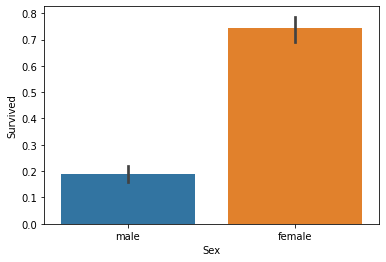

In [667]:
sns.barplot(x="Sex",y="Survived",data=train_data)
plt.show()
# plt.title('Sex')

In [668]:
print("percentage females:",train_data["Survived"][train_data["Sex"]=="female"].value_counts(normalize=True)[1]*100,"%")
print("percentage males:",train_data["Survived"][train_data["Sex"]=="male"].value_counts(normalize=True)[1]*100,"%")

percentage females: 74.20382165605095 %
percentage males: 18.890814558058924 %


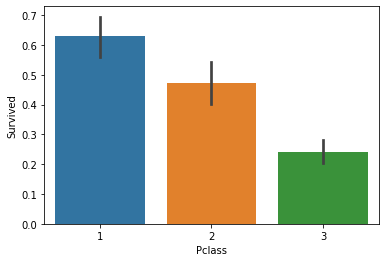

In [669]:
sns.barplot(x="Pclass",y="Survived",data=train_data)
plt.show()

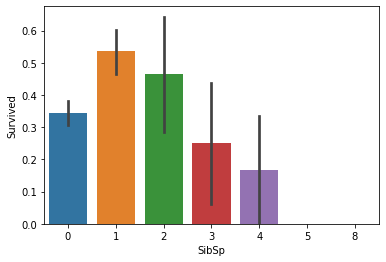

In [670]:
sns.barplot(x="SibSp",y="Survived",data=train_data)
plt.show()

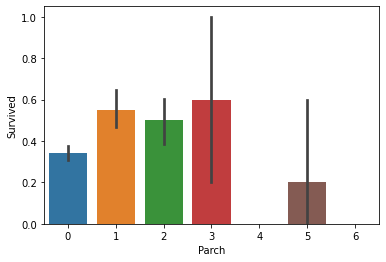

In [671]:
sns.barplot(x="Parch",y="Survived",data=train_data)
plt.show()

In [672]:
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
train_data["Age"] = train_data["Age"].astype(int)
train_data["Age"] = train_data["Age"].astype(int)

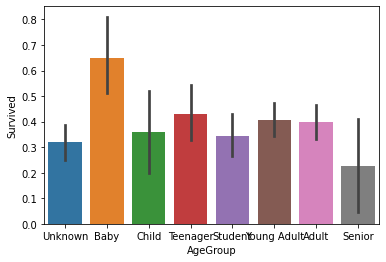

In [673]:
bins= [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_data["AgeGroup"] = pd.cut(train_data["Age"], bins, labels = labels)
test_data["AgeGroup"] = pd.cut(test_data["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.show()

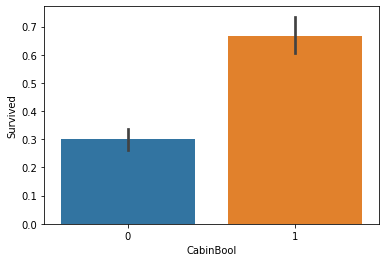

In [674]:
train_data["CabinBool" ] = (train_data["Cabin"].notnull().astype('int'))
test_data["CabinBool" ] = (test_data["Cabin"].notnull().astype('int'))

sns.barplot(x="CabinBool", y="Survived", data=train_data)
plt.show()

In [675]:
# test_data.describe(include='all')

In [676]:
train_data = train_data.drop(["Cabin"],axis=1)
test_data = test_data.drop(["Cabin"],axis=1)

In [677]:
train_data = train_data.drop(["Ticket"],axis=1)
test_data = test_data.drop(["Ticket"],axis=1)

In [678]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Young Adult,0


In [679]:
# 登陆口岸
s = train_data[train_data["Embarked"]=="S"].shape[0]
print("S:",s)
c = train_data[train_data["Embarked"]=="C"].shape[0]
print("C:",c)
q = train_data[train_data["Embarked"]=="Q"].shape[0]
print("Q:",q)

S: 644
C: 168
Q: 77


In [680]:
train_data=train_data.fillna({"Embarked": "S"})
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data["Embarked"] = train_data['Embarked'].map(embarked_mapping)
test_data["Embarked"] = test_data['Embarked'].map(embarked_mapping)

In [681]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891.000000,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,NaN,NaN,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,NaN,219,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.783389,0.523008,0.381594,32.204208,1.361392,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.597344,1.102743,0.806057,49.693429,0.635673,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,7.910400,1.000000,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,1.000000,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,2.000000,NaN,0.000000


In [682]:
combine = [train_data,test_data]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data["Title"],train_data["Sex"])   

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [683]:
for dataset in combine:
    dataset['Title'] = dataset["Title"].replace(['Lady', 'Don','Capt', 'Col',"Dr","Major","Rev","Jonkheer","Dona"], 'Rare')
    dataset['Title'] = dataset["Title"].replace(['Countess', 'Sir'], 'Royal')
    dataset['Title'] = dataset["Title"].replace(['Mlle', 'Ms'], 'Miss') 
    dataset['Title'] = dataset["Title"].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [684]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,1,Student,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,2,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,1,Young Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,1,Young Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,1,Young Adult,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,1,Young Adult,0,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,1,Student,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,23.4500,1,Unknown,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,2,Young Adult,1,Mr


In [685]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,1,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,2,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,1,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,1,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,1,Young Adult,0,1.0


In [686]:
mr_age = train_data[train_data["Title"]==1]["AgeGroup"].mode() #Young Adult
miss_age = train_data[train_data["Title"]==2]["AgeGroup"].mode() #Student
mrs_age = train_data[train_data["Title"]==3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"]==4]["AgeGroup"].mode() #Baby
royal_age = train_data[train_data["Title"]==5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"]==6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
# print(train_data)
for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]]

        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,1,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,2,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,1,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,1,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,1,Young Adult,0,1.0


In [687]:
age_mapping = {"Baby": 1, "Child": 2, "Teenager": 3, "Student": 4, "Young Adult": 5, "Adult": 6, "Senior": 7}
train_data["AgeGroup"] = train_data["AgeGroup"].map(age_mapping)
test_data["AgeGroup"] = test_data["AgeGroup"].map(age_mapping)
train_data["AgeGroup"] = train_data["AgeGroup"].astype(int)
test_data["AgeGroup"] = test_data["AgeGroup"].astype(int)

print(train_data.head())

train_data=train_data.drop(["Age"],axis=1)
test_data=test_data.drop(["Age"],axis=1)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch     Fare  Embarked  AgeGroup  CabinBool  Title  
0      0   7.2500         1         4          0    1.0  
1      0  71.2833         2         6          1    3.0  
2      0   7.9250         1         5          0    2.0  
3      0  53.1000         1         5          1    3.0  
4      0   8.0500         1         

In [688]:
train_data=train_data.drop(["Name"],axis=1)
test_data=test_data.drop(["Name"],axis=1)

In [689]:
sex_mapping = {"male":0,"female":1}
print(train_data.head())
train_data["Sex"] = train_data["Sex"].map(sex_mapping)
test_data["Sex"] = test_data["Sex"].map(sex_mapping)
train_data.head()

   PassengerId  Survived  Pclass     Sex  SibSp  Parch     Fare  Embarked  \
0            1         0       3    male      1      0   7.2500         1   
1            2         1       1  female      1      0  71.2833         2   
2            3         1       3  female      0      0   7.9250         1   
3            4         1       1  female      1      0  53.1000         1   
4            5         0       3    male      0      0   8.0500         1   

   AgeGroup  CabinBool  Title  
0         4          0    1.0  
1         6          1    3.0  
2         5          0    2.0  
3         5          1    3.0  
4         5          0    1.0  


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4,0,1.0
1,2,1,1,1,1,0,71.2833,2,6,1,3.0
2,3,1,3,1,0,0,7.9250,1,5,0,2.0
3,4,1,1,1,1,0,53.1000,1,5,1,3.0
4,5,0,3,0,0,0,8.0500,1,5,0,1.0


In [690]:
# for x in range(len(test_data["Fare"])):
#   if pd.isnull(test_data["Fare"][x]):
#     pclass = test_data["Pclass"][x]
#     test_data["Fare"][x] = round( [train_data["Pclass"] == pclass]["Fare"].mean(), 4)

train_data["FareBand"] = pd.qcut(train_data["Fare"], 4,labels =[ 1, 2, 3, 4])
test_data["FareBand"] = pd.qcut(test_data["Fare"], 4,labels =[ 1, 2, 3, 4])

train_data = train_data.drop(["Fare"], axis=1)
test_data = test_data.drop(["Fare"], axis=1)

In [691]:
train_data["Title"] = train_data['Title'].astype('int')

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [692]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


In [693]:
from sklearn.model_selection import train_test_split

predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
# train训练集
# validate 验证集
# test测试集
x_train, x_validate, y_train, y_validate = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# 打印
print(x_train.head())
print(x_validate.shape)
print(y_train.head())
print(y_validate.shape)

     Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  CabinBool  Title FareBand
172       3    1      1      1         1         1          0      2        2
447       1    0      0      0         1         5          0      1        3
597       3    0      0      0         1         6          0      1        1
204       3    0      0      0         1         3          0      1        2
240       3    1      1      0         2         4          0      2        2
(197, 9)
172    1
447    1
597    0
204    1
240    0
Name: Survived, dtype: int64
(197,)


In [694]:
# 贝叶斯算法
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

guassian = GaussianNB()
guassian.fit(x_train, y_train)
y_pred = guassian.predict(x_validate)
acc_guassian = round(accuracy_score(y_pred, y_validate) * 100, 2)
print(acc_guassian)

78.68


In [695]:
# 逻辑回归 Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_validate)
acc_log = round(accuracy_score(y_pred, y_validate) * 100, 2)

print(acc_log)

79.7


In [696]:
# 向量机算法
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_validate)
acc_svc = round(accuracy_score(y_pred, y_validate) * 100, 2)
print(acc_svc)

82.23


In [697]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(dual=False)
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_validate)
acc_linear_svc = round(accuracy_score(y_pred, y_validate) * 100, 2)
print(acc_linear_svc)

78.68


In [698]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_validate)
acc_gbk = round(accuracy_score(y_pred, y_validate) * 100, 2)
print(acc_gbk)

83.25


In [699]:
ids=test_data["PassengerId"]
print(test_data.head())
predictions = gbk.predict(test_data.drop("PassengerId",axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv(submission_path, index = False)

   PassengerId  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  CabinBool  \
0          892       3    0      0      0         3         5          0   
1          893       3    1      1      0         1         6          0   
2          894       2    0      0      0         3         7          0   
3          895       3    0      0      0         1         5          0   
4          896       3    1      1      1         1         4          0   

   Title FareBand  
0      1        1  
1      3        1  
2      1        2  
3      1        2  
4      3        2  


In [706]:
submission_data = pd.read_csv(submission_path)
submission_data.head(100)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
95,987,0
96,988,1
97,989,0
98,990,1
